   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


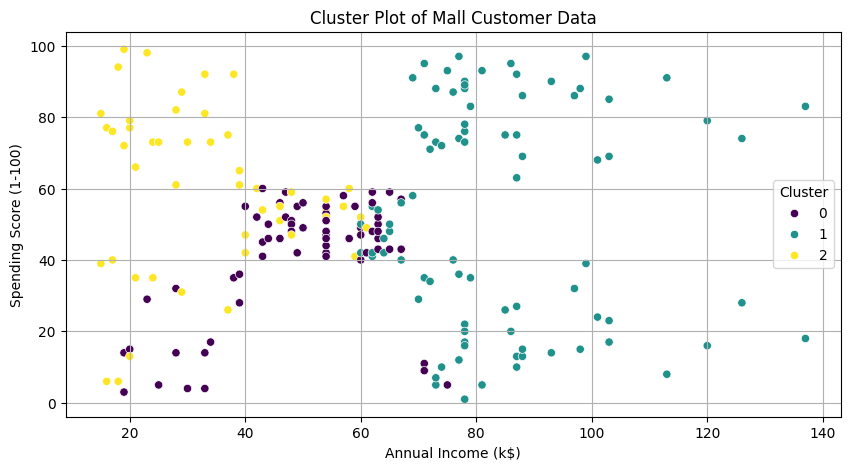

In [2]:
# Cluster plot of Mall Customer Dataset 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv('C:/Users/abdul/OneDrive/Desktop/ByteWise_ML/Day_17/Mall_Customers.csv')
print(df.head(5))

X = df.drop(columns=['Genre'])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('Cluster Plot of Mall Customer Data')
plt.grid()
plt.show()


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


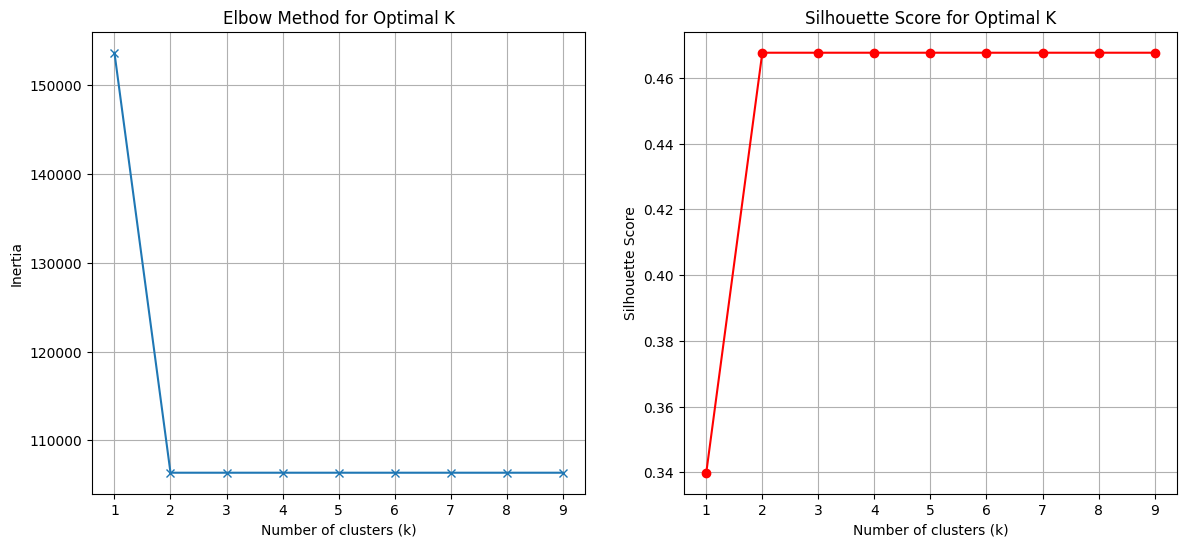

In [1]:
# Optimal Number of Clusters: Elbow Method and Silhouette Score

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv('C:/Users/abdul/OneDrive/Desktop/ByteWise_ML/Day_17/Mall_Customers.csv')
print(df.head(5))
X = df.drop(columns=['Genre'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def bro(data,k):
    mean=[]
    inertia=[]
    score=[]
    
    for i in range(1,k):
        kmeans =KMeans(n_clusters=3)
        labels = kmeans.fit_predict(data)
        mean.append(i)
        inertia.append(kmeans.inertia_)
        score.append(silhouette_score(data,labels).sum())
        
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(mean, inertia, marker='x')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.grid()
    
    plt.subplot(1, 2, 2)
    plt.plot(mean, score, marker='o', color='r')
    plt.title('Silhouette Score for Optimal K')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.grid()
    
    plt.show()

bro(df[['Annual Income (k$)','Spending Score (1-100)']],10)

         CustomerID  Genre     Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                       
0            73.254  0.540  54.714              49.492                  40.571
1           155.322  0.552  34.414              83.839                  51.839
2            39.440  0.600  26.580              34.000                  59.480


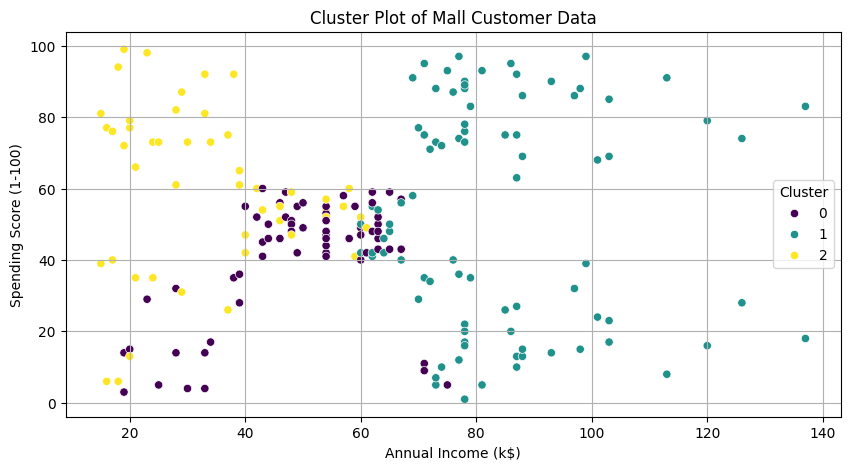

In [7]:
# Cluster Profiling and Insights

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv('C:/Users/abdul/OneDrive/Desktop/ByteWise_ML/Day_17/Mall_Customers.csv')
X = df.drop(columns=['Genre'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Cluster Summary of each column 
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})
Cluster_summary = df.groupby('Cluster').mean().round(3)
print(Cluster_summary)

        
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('Cluster Plot of Mall Customer Data')
plt.grid()
plt.show()


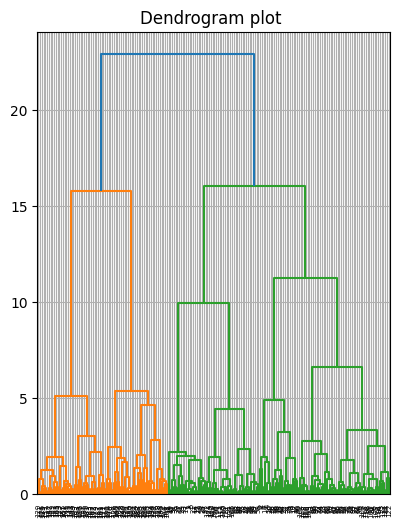

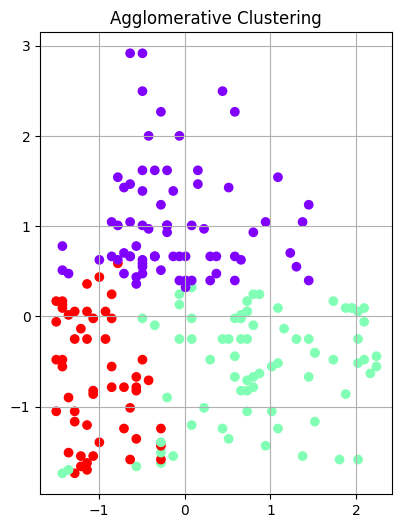

In [6]:
#  Hierarchical Clustering for Customer Segmentation
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

df = pd.read_csv('C:/Users/abdul/OneDrive/Desktop/ByteWise_ML/Day_17/Mall_Customers.csv')
X = df.drop(columns=['Genre'])

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = linkage(X,method='ward')


a = AgglomerativeClustering(n_clusters=3)
labels = a.fit_predict(X)

y = linkage(X,method='ward')
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
dendrogram(y)
plt.title('Dendrogram plot ')
plt.grid()


plt.figure(figsize=(10,6))
plt.subplot(1,2,2)
plt.scatter(X[:,1],X[:,2],c=labels,cmap='rainbow')
plt.title("Agglomerative Clustering")
plt.grid()
plt.show()

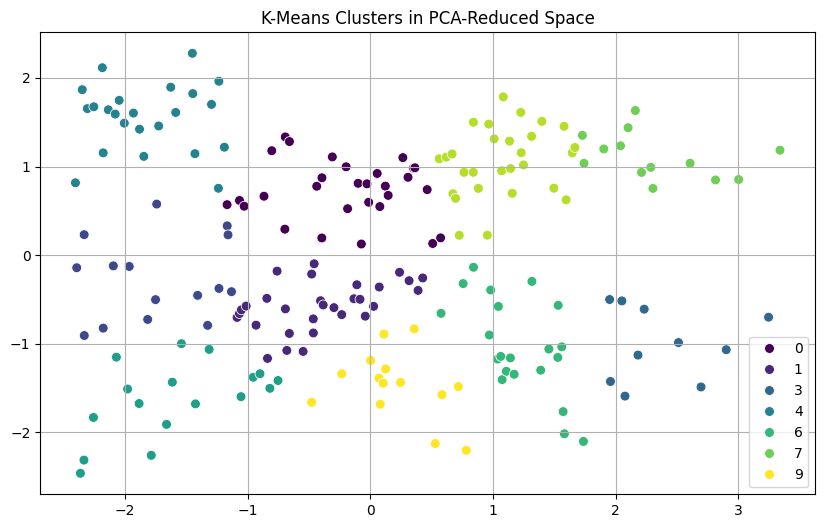

In [4]:
#  Visualizing Clusters with PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('C:/Users/abdul/OneDrive/Desktop/ByteWise_ML/Day_17/Mall_Customers.csv')
X = df.drop(columns=['Genre'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

def bro(data, k):
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(data)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=cluster_labels, palette='viridis', s=50)
    plt.title('K-Means Clusters in PCA-Reduced Space')
    plt.grid()
    plt.legend()
    plt.show()

bro(X_pca, 10)
